# 1. install Dependencies

In [64]:
#!pip install tensorflow  

In [65]:
#pip install --upgrade pip


In [66]:
#!pip install opencv-python

In [67]:
import tensorflow as tf
import os

In [68]:
# Get the list of available physical GPUs

gpus = tf.config.experimental.list_physical_devices('GPU')

In [69]:
# Enable dynamic memory growth for each GPU

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2 Remove dodgy images

In [70]:
import cv2
import imghdr

In [71]:
os.listdir("data")

['happy', 'sad']

In [72]:
# Define the directory containing the image data

data_dir = 'data'

In [73]:
# Specify valid image file extensions

image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [74]:
# Iterate through image classes in the data directory

for image_class  in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))


# Load Data

In [75]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
# Load image data from the specified directory using TensorFlow's image_dataset_from_directory

data = tf.keras.utils.image_dataset_from_directory('data')

Found 187 files belonging to 2 classes.


In [77]:
# Create a numpy iterator for the image dataset

data_iterator = data.as_numpy_iterator()

In [78]:
# Retrieve a batch of data from the iterator

batch = data_iterator.next()

KeyboardInterrupt: 

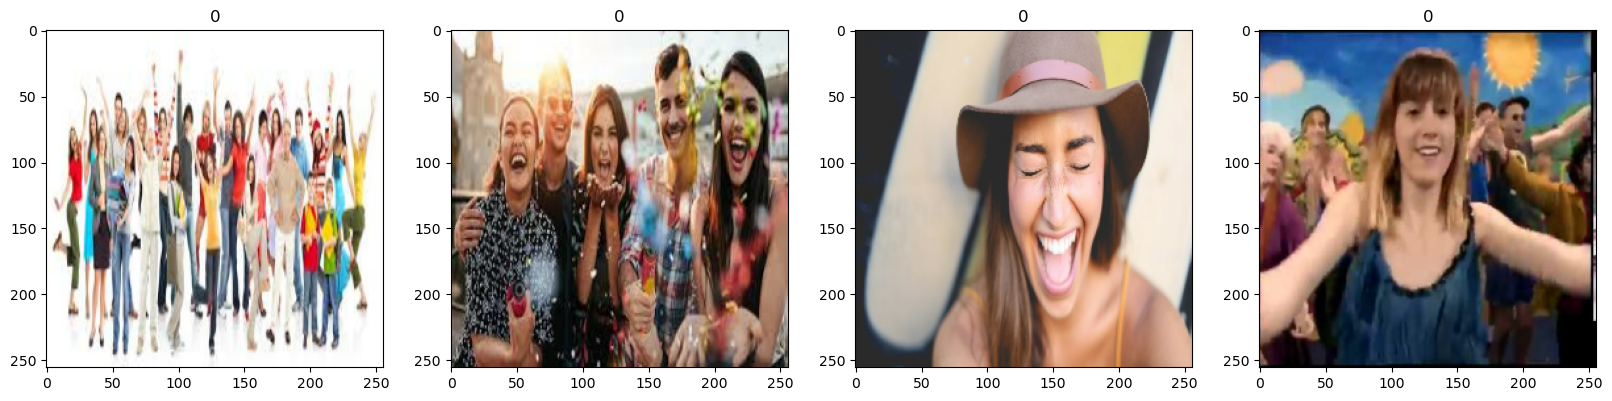

In [ ]:
# 1 sad people
# 0 happy people

fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# 4. Preprocess Data


In [ ]:
# Map the data to scale the pixel values between 0 and 1

data = data.map(lambda x, y : (x/255,y))

In [ ]:
# Create a numpy iterator for the scaled image dataset

scale_iterator = data.as_numpy_iterator()

In [ ]:
# Retrieve a batch of scaled data from the iterator

batch = scale_iterator.next()

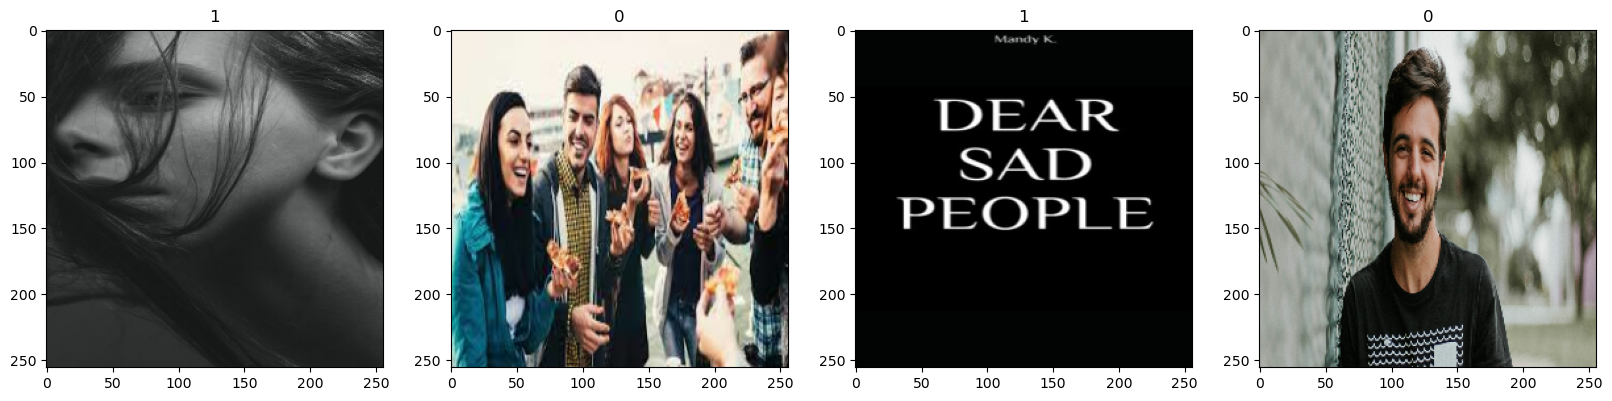

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
len(data)

6

In [ ]:
# train test and val

train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Create a Sequential model

model = Sequential()

In [ ]:
# Add a 2D convolutional layer with 16 filters, a 3x3 kernel, 'relu' activation, and input shape (256, 256, 3)
# Add a 2D max pooling layer with a pool size of (2, 2)

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 32 filters and a 3x3 kernel
# Add another 2D max pooling layer

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add one more 2D convolutional layer with 16 filters and a 3x3 kernel
# Add another 2D max pooling layer

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing it to the fully connected layers

model.add(Flatten())

# Add a dense layer with 256 neurons and 'relu' activation
# Add the output layer with 1 neuron and 'sigmoid' activation for binary classification

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model using the 'adam' optimizer, binary crossentropy loss, and accuracy metric

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Define the directory for TensorBoard logs

logdir = 'logs'

In [ ]:
# Create a TensorBoard callback to log training information

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Train the model on the training data for 20 epochs, using validation data, and logging to TensorBoard

hist = model.fit(train, epochs=20, validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 21s 2s/step - loss: 1.0685 - accuracy: 0.6094 - val_loss: 0.9497 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7430 - accuracy: 0.5000 - val_loss: 0.6612 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6362 - accuracy: 0.6250 - val_loss: 0.6976 - val_accuracy: 0.5312
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6108 - accuracy: 0.6953 - val_loss: 0.5641 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5061 - accuracy: 0.7578 - val_loss: 1.0814 - val_accuracy: 0.3438
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.6229 - accuracy: 0.6719 - val_loss: 0.6588 - val_accuracy: 0.5312
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.5393 - accuracy: 0.6875 - val_loss: 0.5459 - val_accuracy: 0.9062
Epoch 8/20
4/4 [========================

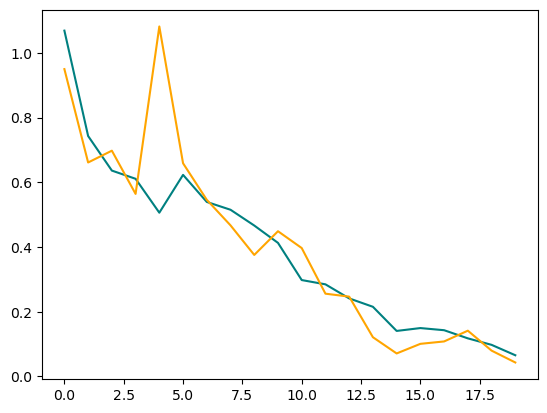

In [ ]:
# Plot the training and validation loss

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.show()


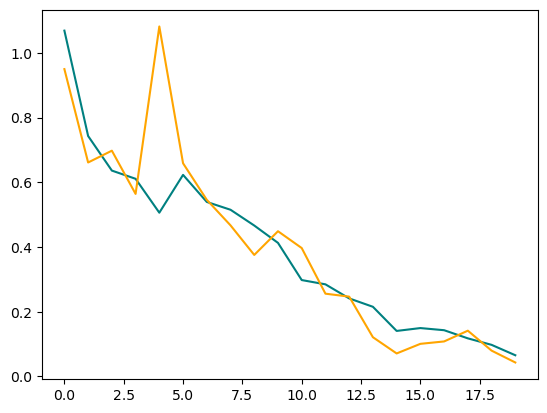

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
# Create instances of metrics

pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [ ]:
# Iterate through batches in the test dataset

for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    biacc.update_state(y,yhat)

1/1 [==============================] - 1s 724ms/step


In [ ]:
# Display the final results of Precision, Recall, and Binary Accuracy

print(f"Precision:{pre.result()} ", f"Recall: {re.result()}",f"BinaryAccuracy:{biacc.result()} " )

Precision:1.0  Recall: 1.0 BinaryAccuracy:1.0 


# Test

In [ ]:
# Load the image
imgtest = cv2.imread("happytest.JPG")

# Show the original image
plt.imshow(cv2.cvtColor(imgtest, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

# Resize the image
resize = tf.image.resize(imgtest, (256, 256))

# Show the image after resizing
plt.imshow(resize.numpy().astype(int))
plt.title("Resized Image")
plt.show()

# Normalize and expand dimensions for prediction
input_image = np.expand_dims(resize / 255, 0)

# Make the prediction
yhat = model.predict(input_image)

# Print the result
if yhat[0] < 0.5:
    print("HAPPY")
else:
    print("SAD")

Save Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\Hp\miniconda3\envs\proyecto_ml\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
